In [1]:
import pandas as pd

# Load the datasets
customers_df = pd.read_csv("Customers.csv")
products_df = pd.read_csv("Products.csv")
transactions_df = pd.read_csv("Transactions.csv")

In [2]:
# Display the first 5 rows of each dataset
print("Customers Data:")
print(customers_df.head())

print("\nProducts Data:")
print(products_df.head())

print("\nTransactions Data:")
print(transactions_df.head())

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

In [3]:
print("Missing Values in Customers Data:")
print(customers_df.isnull().sum())

print("\nMissing Values in Products Data:")
print(products_df.isnull().sum())

print("\nMissing Values in Transactions Data:")
print(transactions_df.isnull().sum())

Missing Values in Customers Data:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products Data:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions Data:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [4]:
print("Basic Statistics for Transactions Data:")
print(transactions_df.describe())

Basic Statistics for Transactions Data:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [5]:
# Convert 'SignupDate' and 'TransactionDate' to datetime format
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

In [6]:
# Merge transactions with customers and products
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='left')
merged_df = pd.merge(merged_df, products_df, on='ProductID', how='left')

Matplotlib is building the font cache; this may take a moment.


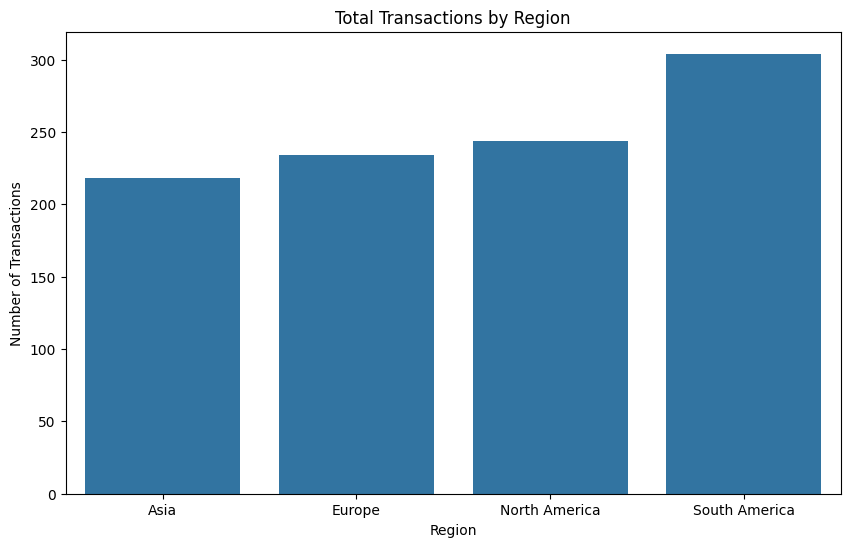

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by region and count transactions
region_transactions = merged_df.groupby('Region')['TransactionID'].count().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='TransactionID', data=region_transactions)
plt.title('Total Transactions by Region')
plt.xlabel('Region')
plt.ylabel('Number of Transactions')
plt.show()

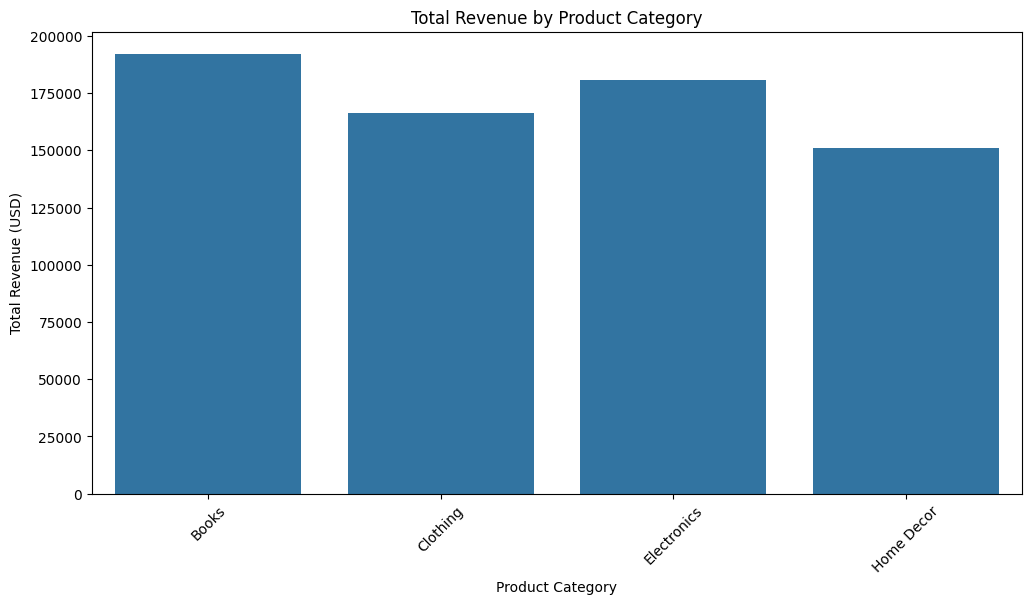

In [8]:
# Group by category and sum total revenue
category_revenue = merged_df.groupby('Category')['TotalValue'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='TotalValue', data=category_revenue)
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

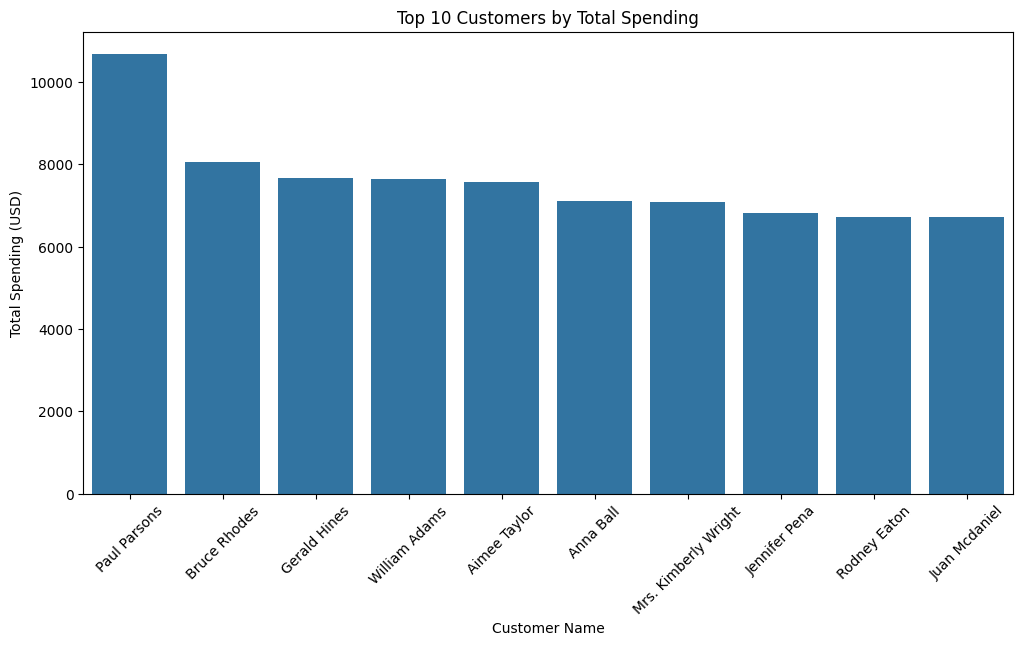

In [9]:
# Group by customer and sum total spending
top_customers = merged_df.groupby('CustomerName')['TotalValue'].sum().nlargest(10).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='CustomerName', y='TotalValue', data=top_customers)
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Customer Name')
plt.ylabel('Total Spending (USD)')
plt.xticks(rotation=45)
plt.show()

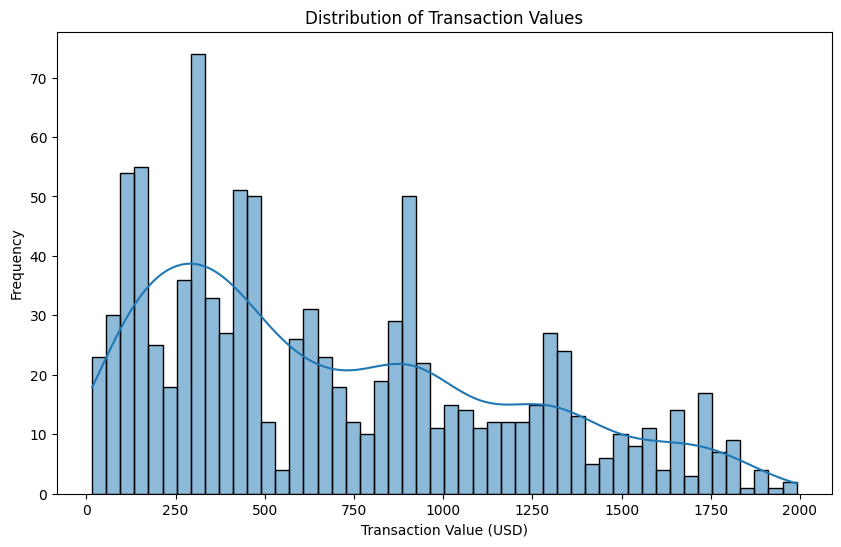

In [10]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['TotalValue'], bins=50, kde=True)
plt.title('Distribution of Transaction Values')
plt.xlabel('Transaction Value (USD)')
plt.ylabel('Frequency')
plt.show()

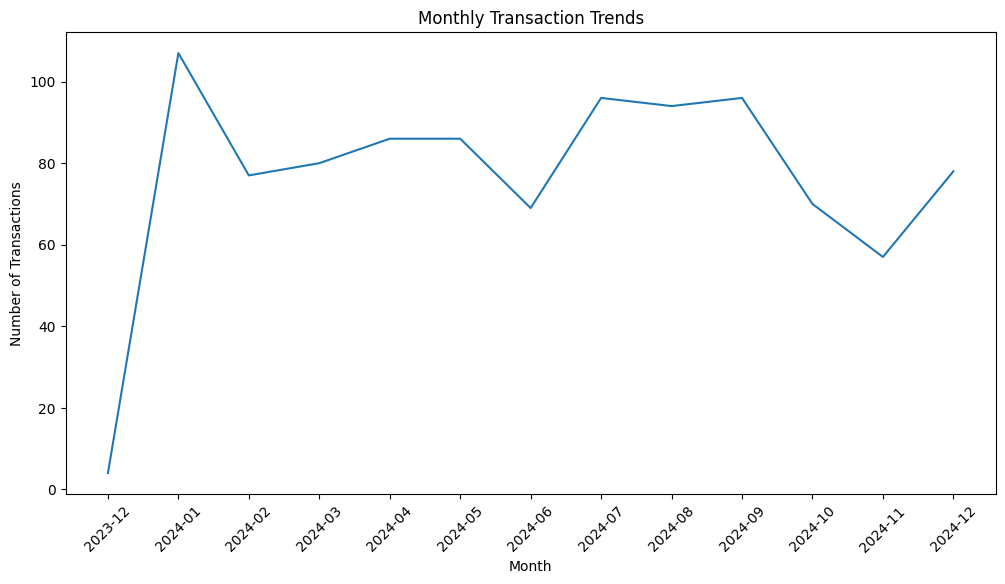

In [13]:
# Extract month from transaction date and convert to string
merged_df['TransactionMonth'] = merged_df['TransactionDate'].dt.to_period('M').astype(str)

# Group by month and count transactions
monthly_transactions = merged_df.groupby('TransactionMonth')['TransactionID'].count().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='TransactionMonth', y='TransactionID', data=monthly_transactions)
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()